In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("adult.csv") 

In [4]:
def clean_data(df):
    df = df.copy()
    df = df.replace('?', np.nan)
    
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
    df['native.country'] = df['native.country'].fillna('United-States')
    
    le = LabelEncoder()
    categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                        'relationship', 'race', 'sex', 'native.country']
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

df_cleaned = clean_data(df)
print(df_cleaned.head())

   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country income  
0              40              38  <=50K  
1              18              38  <=50K  
2              40      

In [5]:
X = df_cleaned.drop(['income', 'education'], axis=1) 
y = df_cleaned['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (26048, 13)
Testing set shape: (6513, 13)


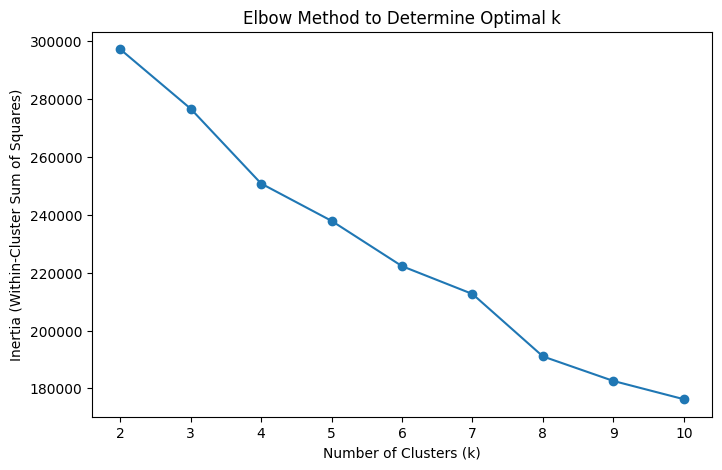

In [6]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

In [14]:
optimal_k = 4  # Change based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_

X_train['Cluster'] = labels

# Evaluate Clustering Performance using Silhouette Score
silhouette_avg = silhouette_score(X_train_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.1686


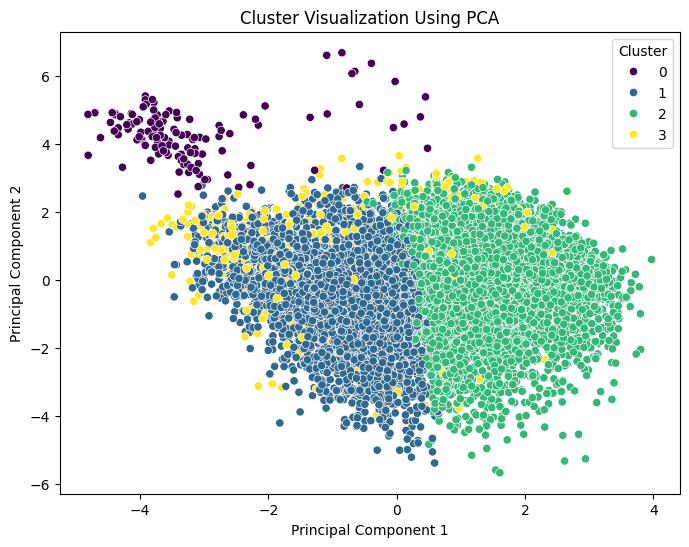

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_train_scaled)

df_viz = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_viz['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue=df_viz['Cluster'], palette="viridis")
plt.title("Cluster Visualization Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

Your dataset, processed without income and education, showed an optimal k=4 based on the Elbow Method, with a Silhouette Score of 0.168. Increasing k to 6 lowered the score to 0.126, indicating weaker separation. The PCA visualization shows four overlapping clusters, with one distinct group and some boundary cases. This suggests that the data forms gradual rather than strict separations, possibly segmenting different socioeconomic or behavioral groups. The isolated cluster may represent a high-variance subset. Further validation with DBI or alternative methods like GMM could improve clarity.
